# LOAD NECESSARY PACKAGES

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# DATA STRUCTURE

In [2]:
df_description = pd.read_excel("Tourism.xlsx", sheet_name="Data Dict")
df = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")
df.head(5)

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Multi,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Multi,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Multi,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.drop(["CustomerID"], axis=1, inplace=True)

**Dropping CustomerID**

- The CustomerID variable was dropped. It was deemed unimportant for analysis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4888 non-null   int64  
 1   Age                      4662 non-null   float64
 2   PreferredLoginDevice     4863 non-null   object 
 3   CityTier                 4888 non-null   int64  
 4   DurationOfPitch          4637 non-null   float64
 5   Occupation               4888 non-null   object 
 6   Gender                   4888 non-null   object 
 7   NumberOfPersonVisited    4888 non-null   int64  
 8   NumberOfFollowups        4843 non-null   float64
 9   ProductPitched           4888 non-null   object 
 10  PreferredPropertyStar    4862 non-null   float64
 11  MaritalStatus            4888 non-null   object 
 12  NumberOfTrips            4748 non-null   float64
 13  Passport                 4888 non-null   int64  
 14  PitchSatisfactionScore  

 **Data Structure**

- The Data has 4888 rows
- It also has 19 columns 
- There are some missing values in some rows
- There are attributres of int64, float64 and object data types

In [5]:
# Convert this columns to categorical - they are supposed to be categorical than int64
to_categories = ["Passport", "OwnCar"]
for feature in to_categories: # Loop through all columns above
    df[feature] = pd.Categorical(df[feature])# convert column to string.

In [6]:
df.describe(include="all")

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
count,4888.000000,4662.000000,4863,4888.000000,4637.000000,4888,4888,4888.000000,4843.000000,4888,4862.000000,4888,4748.000000,4888.0,4888.000000,4888.0,4822.000000,4888,4655.000000
unique,NaN,NaN,2,NaN,NaN,4,3,NaN,NaN,5,NaN,4,NaN,2.0,NaN,2.0,NaN,5,NaN
top,NaN,NaN,Self Enquiry,NaN,NaN,Salaried,Male,NaN,NaN,Multi,NaN,Married,NaN,0.0,NaN,1.0,NaN,Executive,NaN
freq,NaN,NaN,3444,NaN,NaN,2368,2916,NaN,NaN,1842,NaN,2340,NaN,3466.0,NaN,3032.0,NaN,1842,NaN
mean,0.188216,37.622265,NaN,1.654255,15.490835,NaN,NaN,2.905074,3.708445,NaN,3.581037,NaN,3.236521,NaN,3.078151,NaN,1.187267,NaN,23619.853491
std,0.390925,9.316387,NaN,0.916583,8.519643,NaN,NaN,0.724891,1.002509,NaN,0.798009,NaN,1.849019,NaN,1.365792,NaN,0.857861,NaN,5380.698361
min,0.000000,18.000000,NaN,1.000000,5.000000,NaN,NaN,1.000000,1.000000,NaN,3.000000,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,1000.000000
25%,0.000000,31.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,3.000000,NaN,2.000000,NaN,2.000000,NaN,1.000000,NaN,20346.000000
50%,0.000000,36.000000,NaN,1.000000,13.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,NaN,3.000000,NaN,1.000000,NaN,22347.000000
75%,0.000000,44.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,4.000000,NaN,4.000000,NaN,2.000000,NaN,25571.000000


**Key Observation from Data Description**

a) The everage age of customers is 38 years. The youngest is 18 years while the oldest is 61 years old.

b) It takes 15 minutes on everage to sell the the package to customer. Five minutes was fastest time to it took to sell the package, while 2 hour 7 minutes was the longest time it took to sell the package. 

c) Males and persons who were earning salary income were constant customers. Majority of salary earners were executives. 

d) The packages were polular to married customers

In [7]:
df.Passport = df.Passport.astype("int64")
df.OwnCar = df.OwnCar.astype("int64");

In [8]:
df.replace("Fe Male","Female", inplace=True); #Make comment on this

**Replacement Made**

- It was decided that "Fe male" label was meant for "Female" label. Consequently, the "Fe male" label was replace by Female label.  

In [9]:
df.OwnCar.value_counts() #check this relationship OwnCar vs Passport

1    3032
0    1856
Name: OwnCar, dtype: int64

In [10]:
df.Designation.value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

In [11]:
df._get_numeric_data().columns

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisited', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'MonthlyIncome'],
      dtype='object')

#  DATA PREPROCESSING AND EXPOLORATORY DATA ANALYSIS

In [12]:
# Function to plot histogram and boxplot for numerical variables as we study the 
# central tendency and dispersion for such values
def histogram_boxplot(feature, figsize=(10,8), bins = None):
    """ 
    Boxplot and histogram combined with shared axis
    feature: 1-d feature array
    figsize: size of fig (default (10,8))
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [13]:
df.head()

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Multi,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Multi,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Multi,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


Age ,Skew 0.38


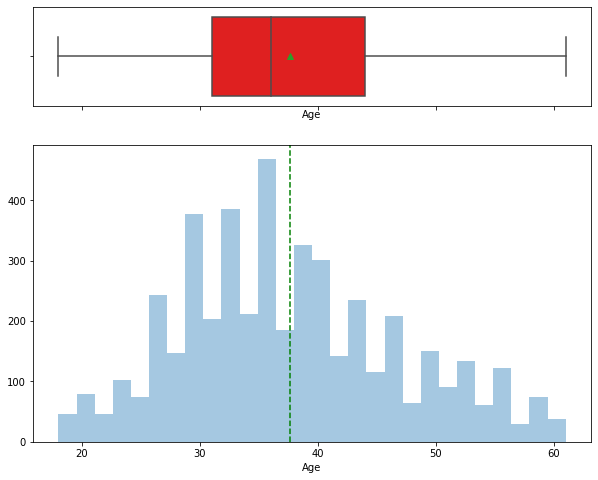

MonthlyIncome ,Skew 1.95


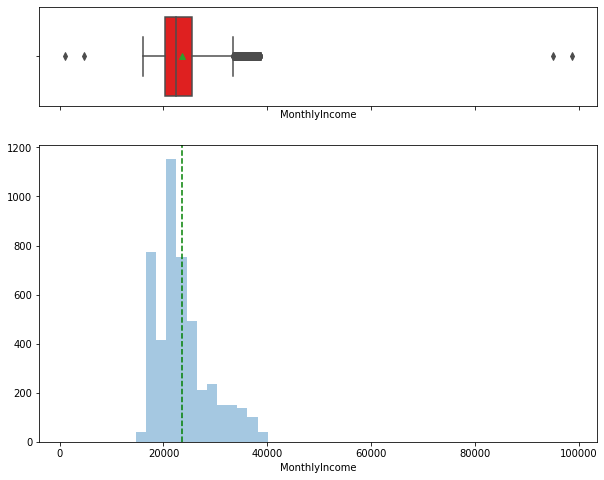

DurationOfPitch ,Skew 1.75


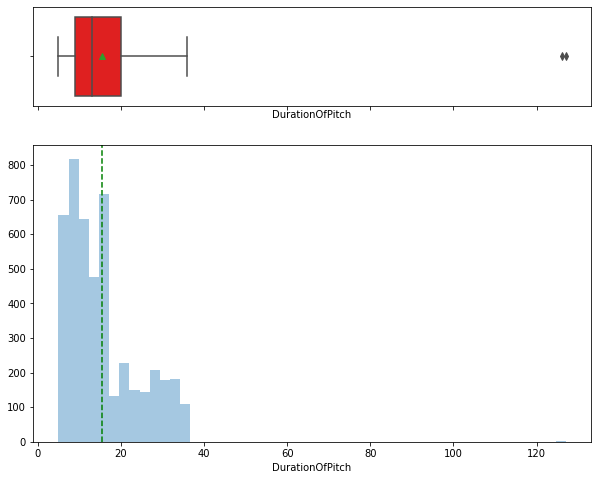

NumberOfPersonVisited ,Skew 0.03


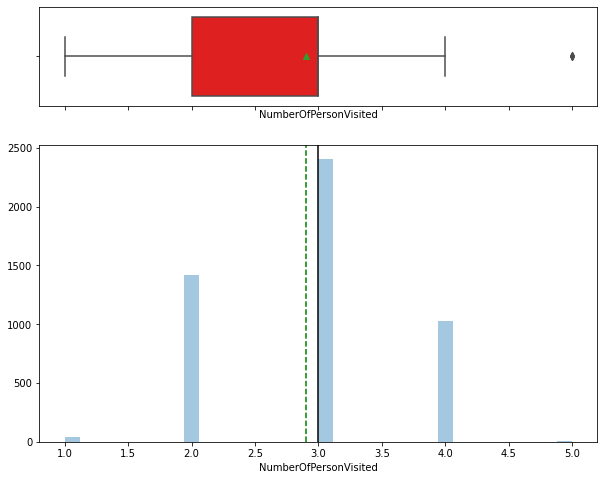

NumberOfFollowups ,Skew -0.37


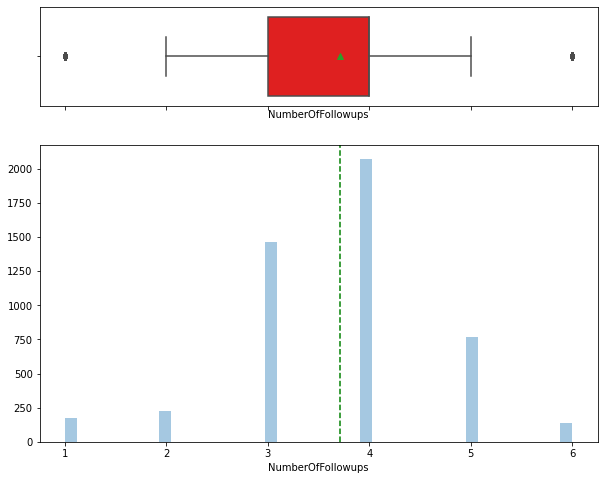

PreferredPropertyStar ,Skew 0.9


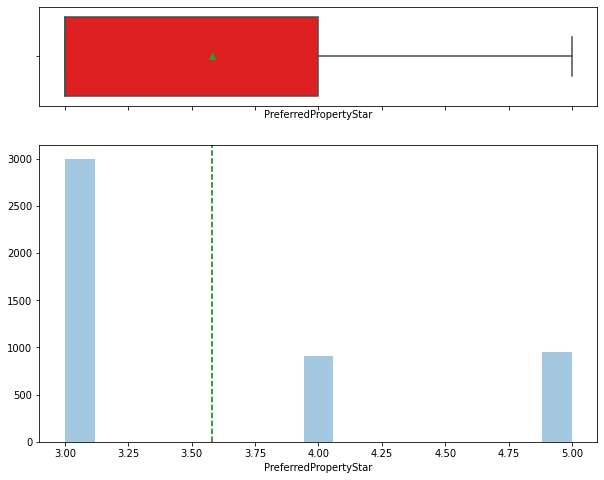

NumberOfTrips ,Skew 1.45


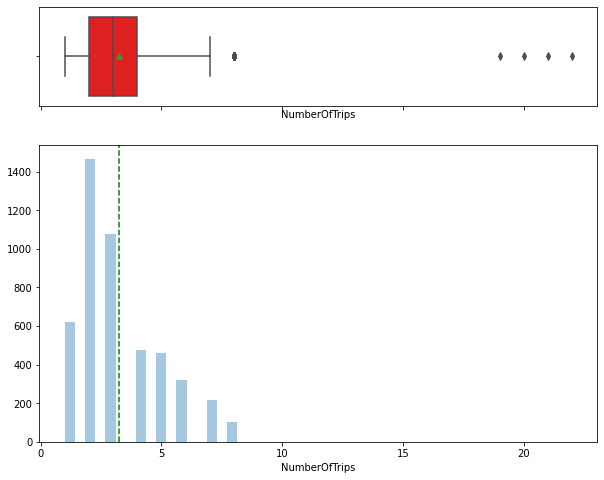

PitchSatisfactionScore ,Skew -0.13


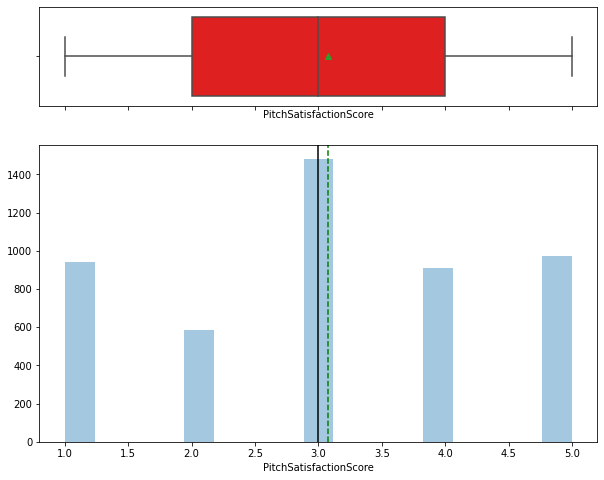

NumberOfChildrenVisited ,Skew 0.27


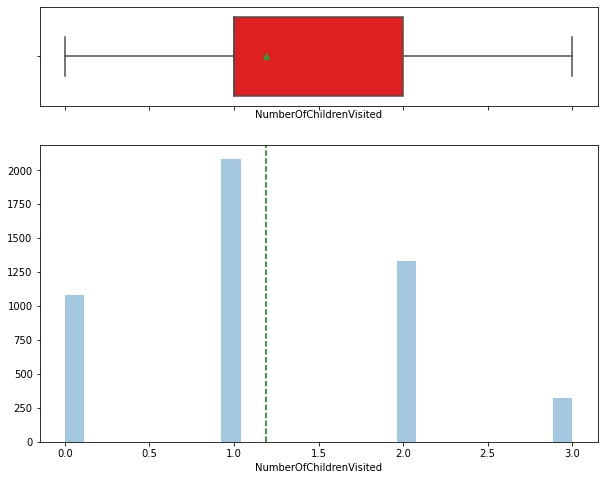

In [14]:
n_cols = ["Age", "MonthlyIncome", "DurationOfPitch","NumberOfPersonVisited",\
          "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", \
          "PitchSatisfactionScore", "NumberOfChildrenVisited"]

for col in n_cols:
    print(col,",Skew", round(df[col].skew(),2))
    histogram_boxplot(feature=df[col])
    plt.show()

**Remarks (On descriptive stats, skewness, outliers, etc of numerical columns):**

- Age has an average of around 37. Age has no outlier and slightly skewed to the left.
- MonthlyIncome with an average of around 23,000 is skewed to the right and with outliers to both ends. Skewness for such a variable as Income is as expected because it is a natural phenomenon to a few people early so high.
- DurationPitch is skewed to the right. On average pitching time is around 18 minutes with extraordinary upper outliers with a pitch time of above 120 minutes (2hours).
- Majority of tourists visited in 3s with one group (or a few) with 5 people. One person hardly showed up for the touring.
- NumberOfTrips is highly skewed to the right with upper outliers and on average a person or a group makes 3 visits. Few people and groups made around 20 trips.

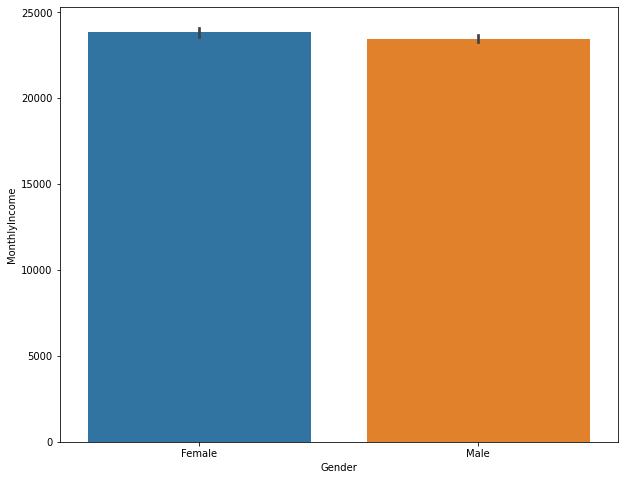

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(df.Gender, df.MonthlyIncome)
plt.show()

Gender          Female  Male   All
Occupation                        
Free Lancer          0     2     2
Large Business     178   256   434
Salaried           942  1426  2368
Small Business     852  1232  2084
All               1972  2916  4888
------------------------------------------------------------------------------------------------------------------------


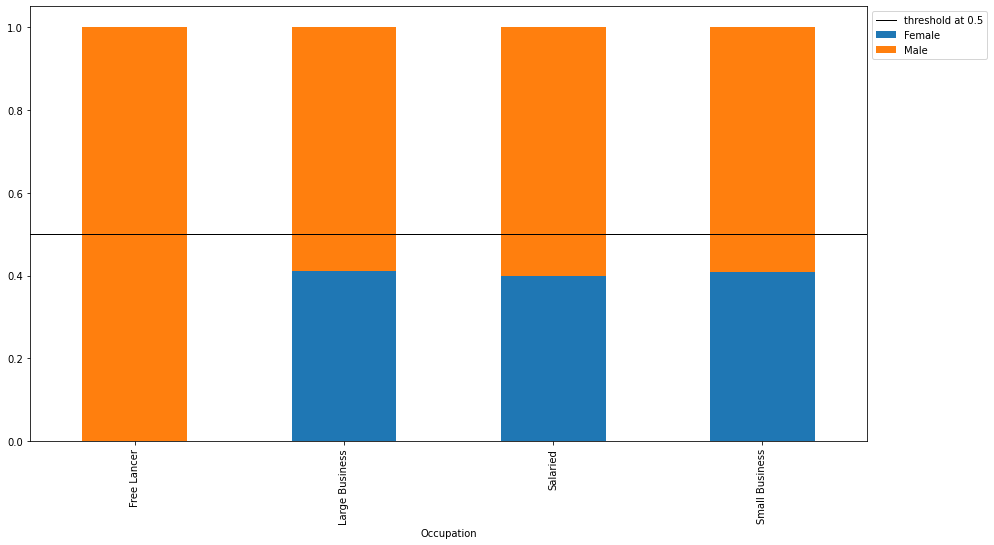

In [16]:
tab1 = pd.crosstab(df.Occupation, df.Gender, margins=True)
print(tab1)

print('-'*120)
tab = pd.crosstab(df.Occupation,df.Gender,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(15,8))
plt.axhline(y=0.5,linewidth=1, color='k', label="threshold at 0.5")
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

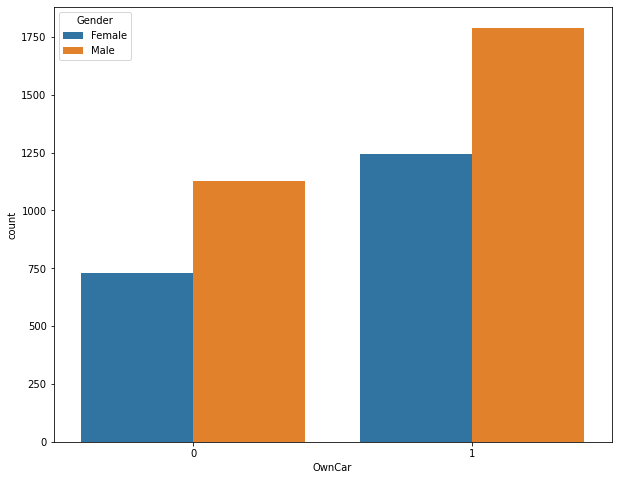

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(df.OwnCar, hue=df.Gender)
plt.show()

Gender  Female  Male   All
OwnCar                    
0          730  1126  1856
1         1242  1790  3032
All       1972  2916  4888
------------------------------------------------------------------------------------------------------------------------


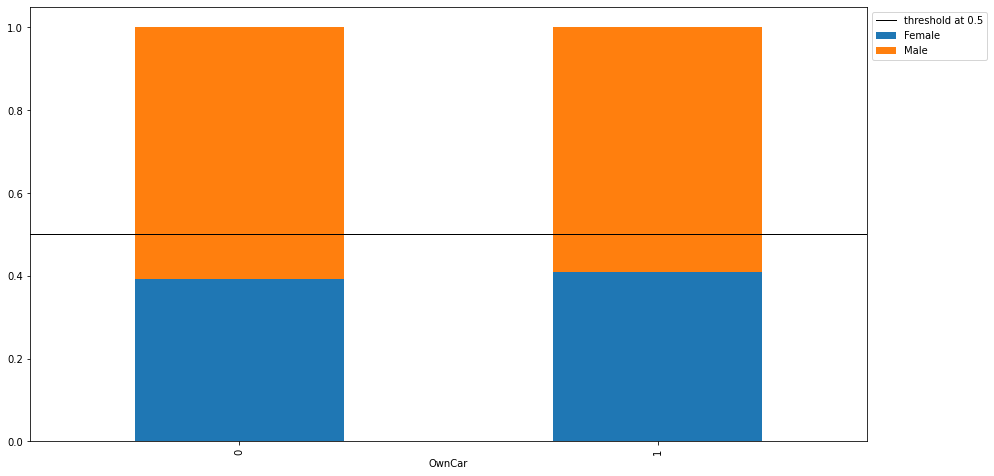

In [18]:
tab2 = pd.crosstab(df.OwnCar, df.Gender, margins=True)
print(tab2)

print('-'*120)
tab22 = pd.crosstab(df.OwnCar,df.Gender,normalize='index')
tab22.plot(kind='bar',stacked=True,figsize=(15,8))
plt.axhline(y=0.5,linewidth=1, color='k', label="threshold at 0.5")
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

Gender          Female  Male   All
Occupation                        
Free Lancer          0     2     2
Large Business     178   256   434
Salaried           942  1426  2368
Small Business     852  1232  2084
All               1972  2916  4888
------------------------------------------------------------------------------------------------------------------------


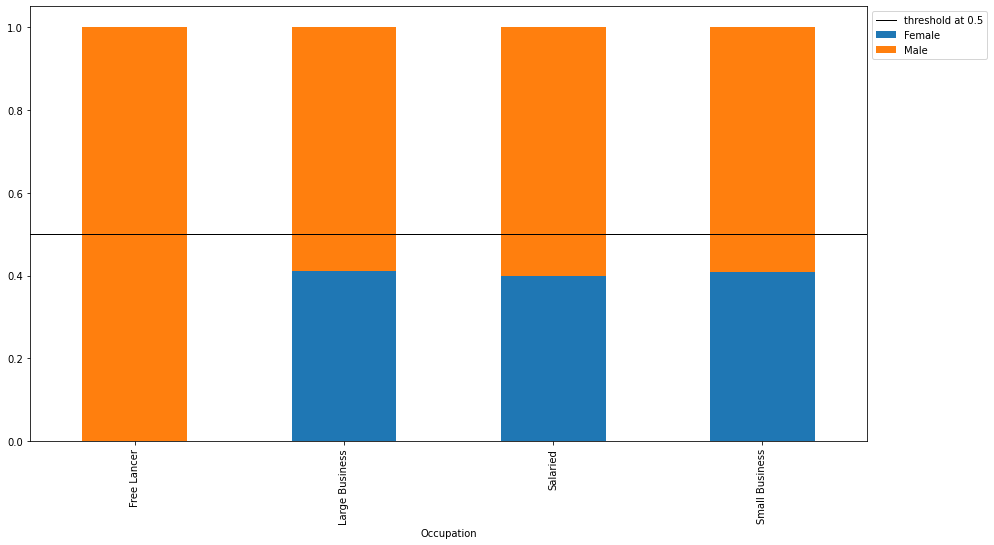

In [19]:
tab2 = pd.crosstab(df.Occupation, df.Gender, margins=True)
print(tab2)

print('-'*120)
tab22 = pd.crosstab(df.Occupation,df.Gender,normalize='index')
tab22.plot(kind='bar',stacked=True,figsize=(15,8))
plt.axhline(y=0.5,linewidth=1, color='k', label="threshold at 0.5")
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

<Figure size 1080x648 with 0 Axes>

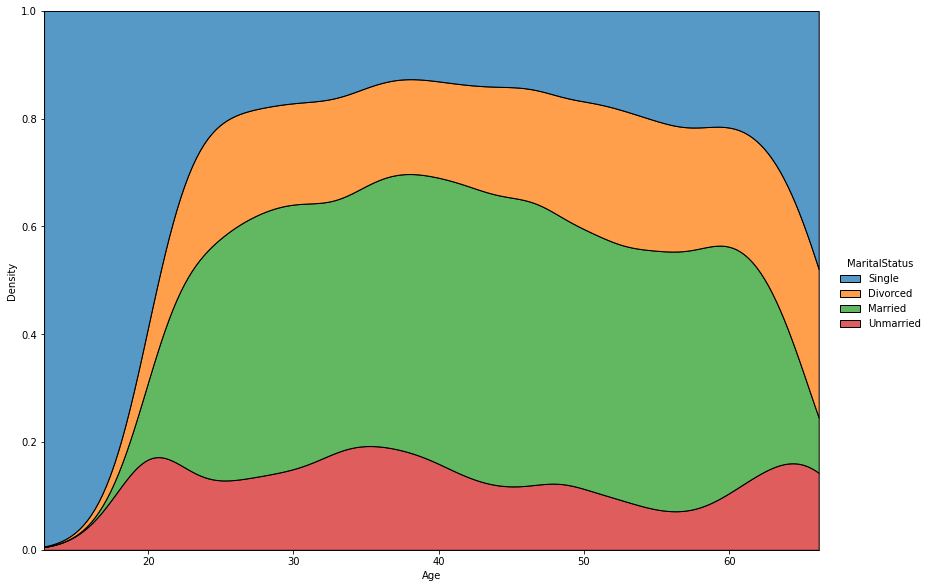

In [20]:
# lets us look at normalized chart of age vs marital status
plt.figure(figsize=(15,9))
sns.displot(
    data=df,
    x="Age", hue="MaritalStatus",
    kind="kde",
    multiple="fill", 
    height=8.27, aspect=11.7/8.27
);

In [21]:
df[["Age","Gender"]].groupby("Gender").mean()

,Age
Gender,
Female,38.065608
Male,37.319986


In [22]:
df[["DurationOfPitch","Gender"]].groupby("Gender").mean()

,DurationOfPitch
Gender,
Female,15.394737
Male,15.555315


In [23]:
# A function to treat outliers.
# Replace upper outliers with value of upper whisker and replace lower outliers with value of lower whisker.
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df
    

In [24]:
# Treat outliers for columns with outliers
treat_col = ["MonthlyIncome", "DurationOfPitch","NumberOfPersonVisited","NumberOfFollowups", "NumberOfTrips"]
for c in treat_col:
    df = treat_outliers(df,c)
        

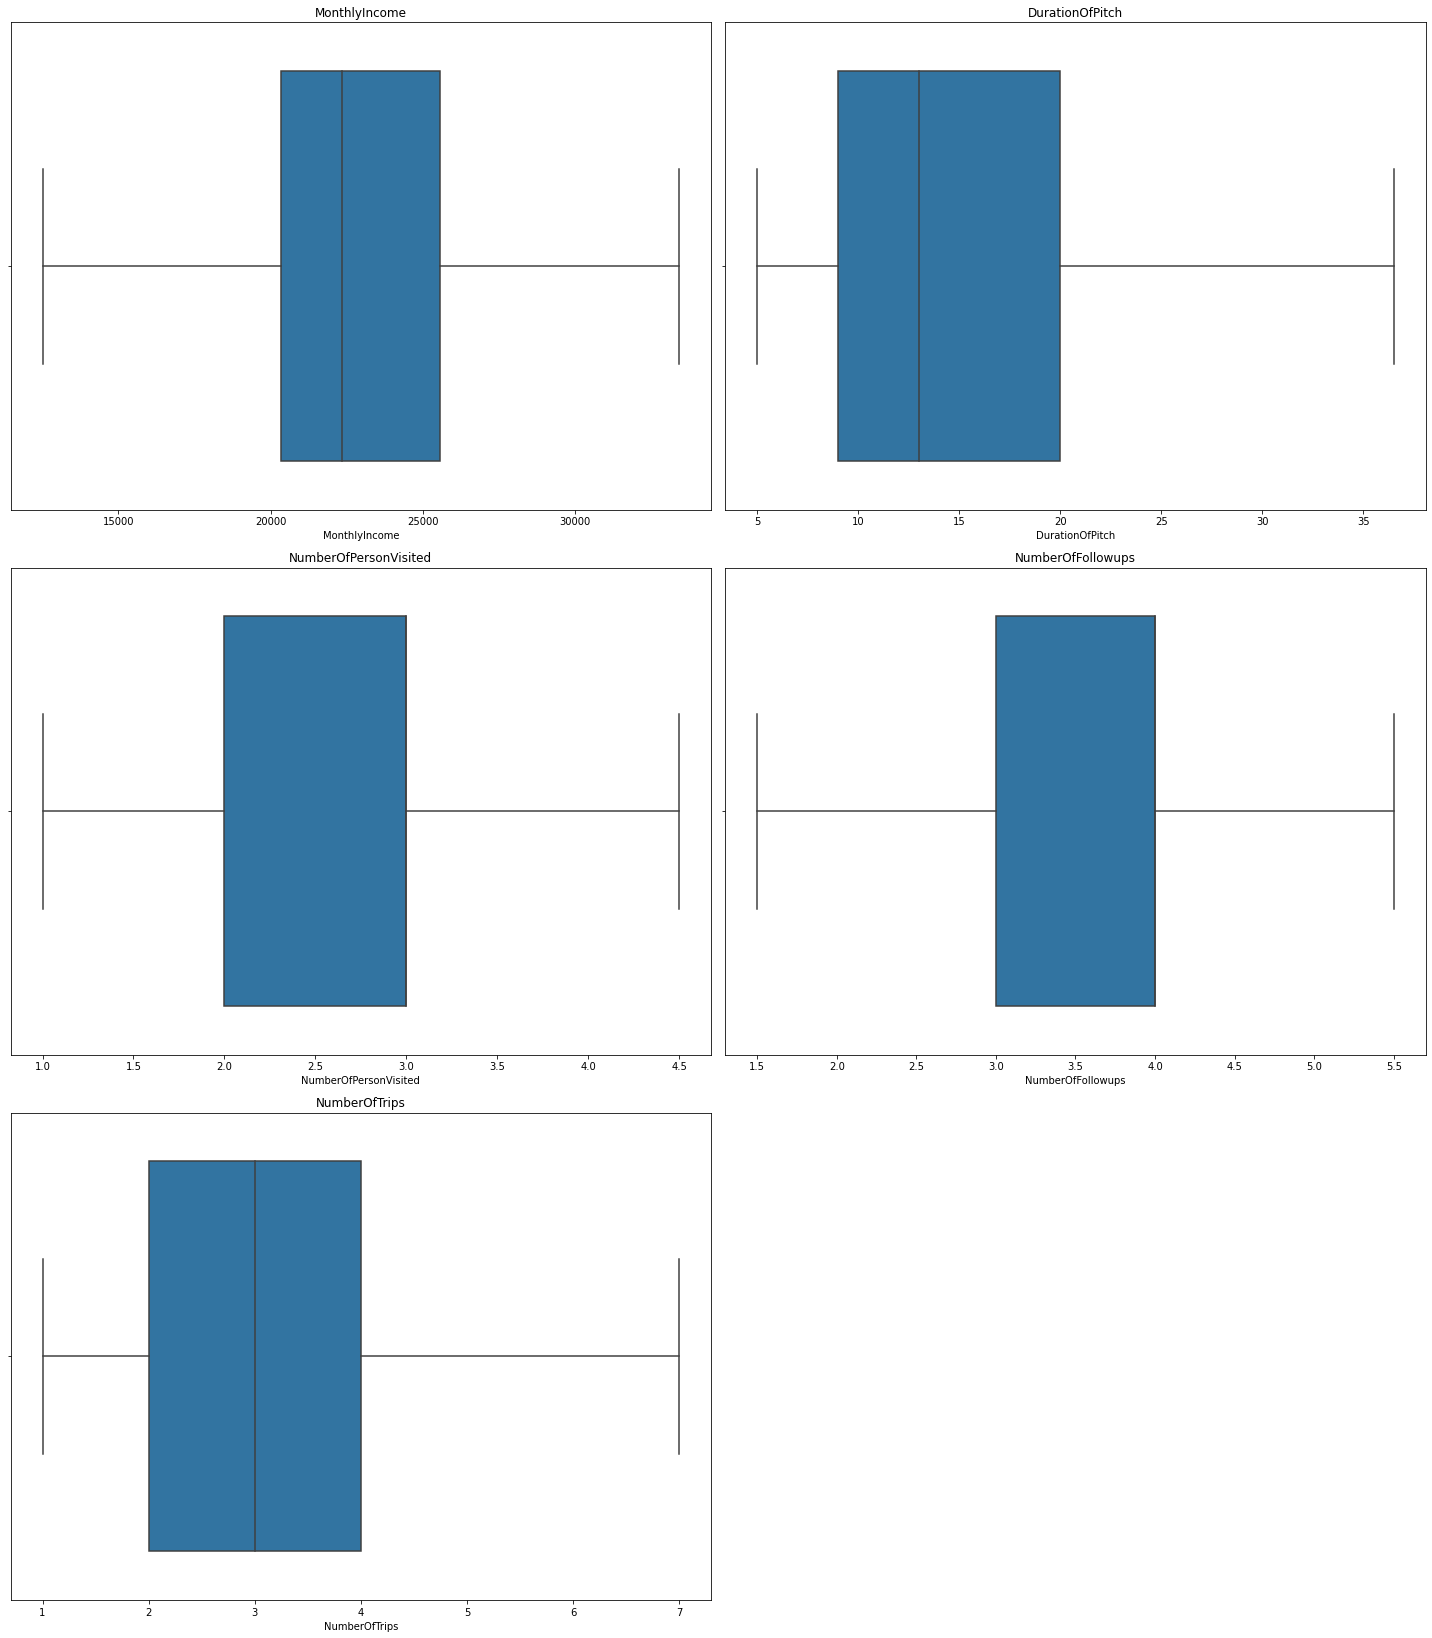

In [25]:
# Check that outliers has been treated boxplot
plt.figure(figsize=(20,30))
for i, variable in enumerate(treat_col):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Remarks (On treating outliers):**

- Numeric features with outliers were treated by replacing lower outliers with lower whisker value and replace upper outliers with upper whisker value. 
- On the original data, the following feature columns was found to contain outliers: MonthlyIncome, DurationOfPitch, NumberOfPersonVisited, NumberOfFollowups, and NumberOfTrips.
- Before and after treating outliers, we used Boxplot to check the presence of outliers and to confirm that outliers were actually treated.

In [26]:
df.columns

Index(['ProdTaken', 'Age', 'PreferredLoginDevice', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

{'Self Enquiry': 0.7082048118445404, 'Company Invited': 0.2917951881554596}


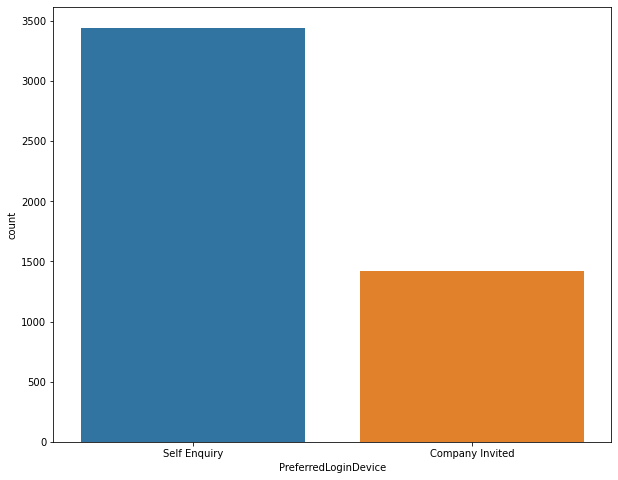

{0: 0.8117839607201309, 1: 0.18821603927986907}


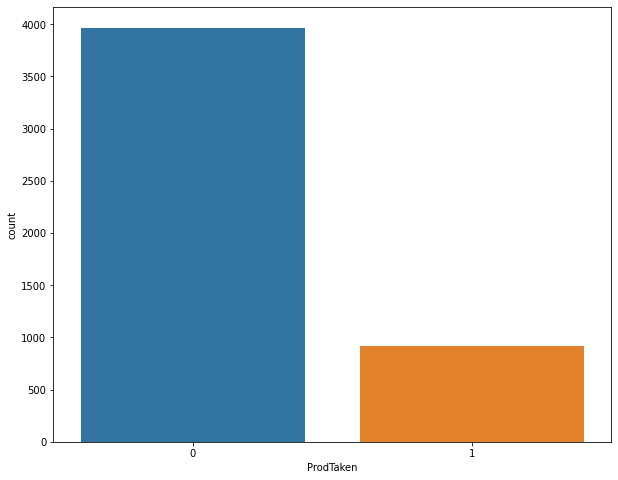

{'Salaried': 0.4844517184942717, 'Small Business': 0.42635024549918166, 'Large Business': 0.08878887070376432, 'Free Lancer': 0.0004091653027823241}


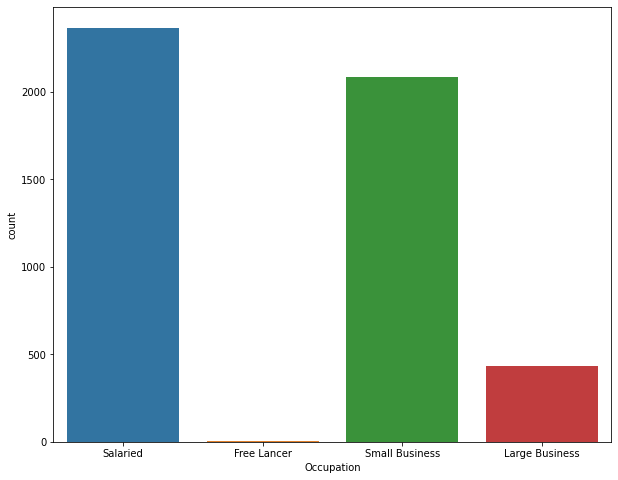

{'Male': 0.5965630114566285, 'Female': 0.4034369885433715}


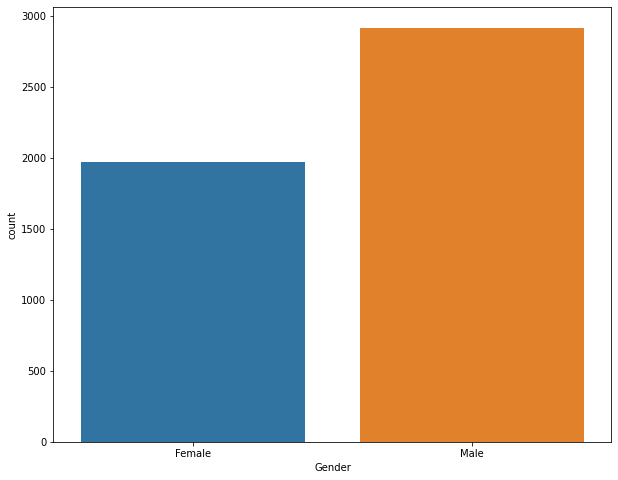

{'Multi': 0.37684124386252044, 'Super Deluxe': 0.35433715220949263, 'Standard': 0.15180032733224222, 'Deluxe': 0.06996726677577741, 'King': 0.04705400981996727}


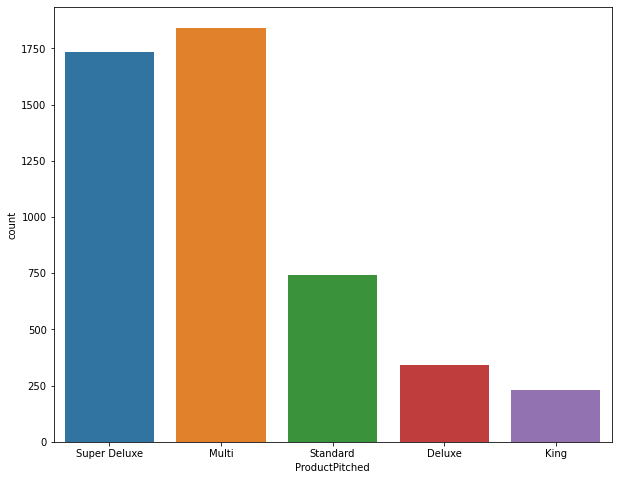

{3.0: 0.6155902920608803, 5.0: 0.19662690250925546, 4.0: 0.18778280542986425}


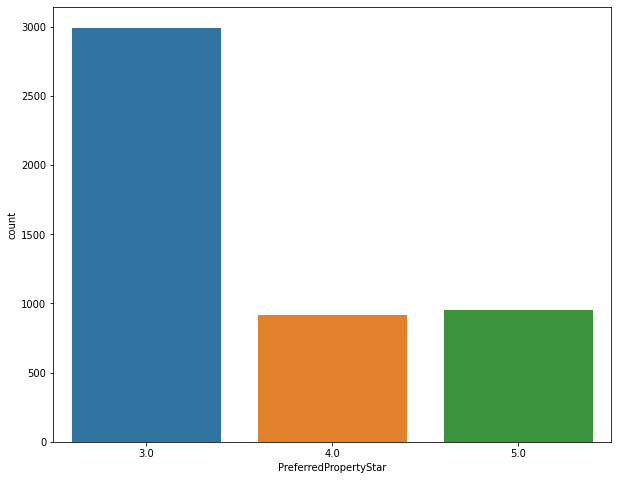

{'Married': 0.4787234042553192, 'Divorced': 0.19435351882160393, 'Single': 0.18739770867430441, 'Unmarried': 0.1395253682487725}


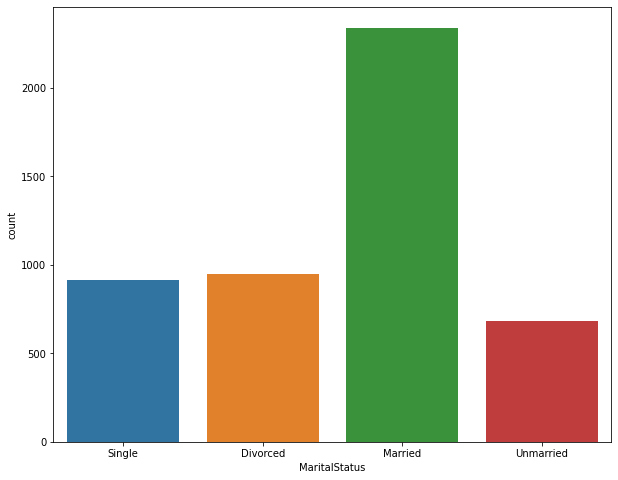

{0: 0.7090834697217676, 1: 0.2909165302782324}


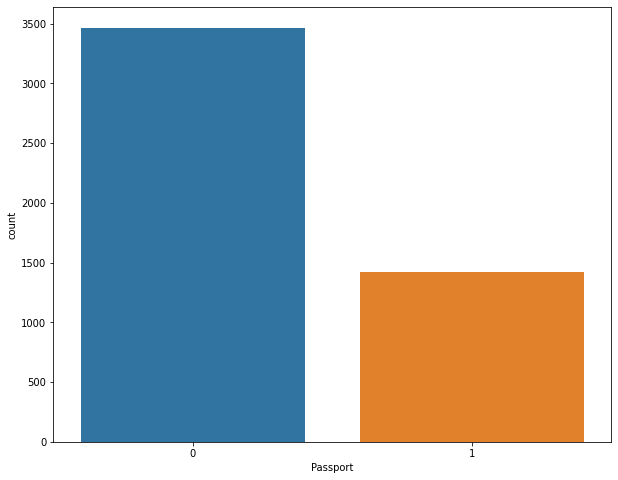

In [27]:
categorical_cols = ["PreferredLoginDevice","ProdTaken","Occupation", "Gender","ProductPitched","PreferredPropertyStar", "MaritalStatus","Passport" ]

for col in categorical_cols:
    plt.figure(figsize=(10,8))
    counts = dict(df[col].value_counts(normalize=True))
    print(counts)
    sns.countplot(df[col])
    plt.show()

**Remarks:**
- Majority of the tourists (70.8%) self-enquired opposed to the firm reaching out.
- Only 18.82% of the customers taken the package.
- On coccupation, majority of the tuorists are salaried (48%) and small business owners(43%) with the Freelance being the least in the group with very few people.
- Gender composition: 59.7% male and 40.3% female.
- The company majorly pitched multiple packages at the same time (37.7% of the time) together with super deluxe package (35%). King was least pitched. On a business perspective, this makes sense because the company will prefer to pitch multiple packages so that the customers have the choices rather than pitch a given package (say king) and which take the power of choice away from the customer kind off. 
- Majority of the tourists (61.56%) prefer lodging to 3-star hotel.
- On marital status, most tourists were married (48%) of the total. This figure is twice higher than the second place: divorced (19%).
- 70.91% of the tourists has no passport and 29.1% possess a passport. Naturally, majority of the people with no passport are the domestic tourists because in most cases foreign tourists requires passport.

For data analysis purposes, packages were ranked as follows:

- Basic: 0
- Standard: 1
- Deluxe: 2
- Super Deluxe: 3
- King: 4
- Multi: 5

In [28]:
# Ordinal columns with respective values to replace with
rank_replace = {
                "ProductPitched": {"Basic": 0, "Standard": 1, "Deluxe": 2, "Super Deluxe": 3, "King": 4, "Multi":5}
            }

# Nominal features
to_dummies = ["PreferredLoginDevice", "Occupation", "Gender", "MaritalStatus", "Designation"]

In [29]:
# Replace ordinal columns with proper number codes
df.replace(rank_replace, inplace=True)

# Create dummies for nominal features.
df=pd.get_dummies(df, columns=to_dummies)

**Missing data imputation:**

- Attempted missing data imputation on the continous columns with mean or median values did not improve the model perfomance fitted later. For this reason we choose to drop any columns with missing values without imputation.

In [32]:
# Drop any row with missing values
df.dropna(inplace=True)

# MODELS BUILDING

In [32]:
X = df.drop("ProdTaken" , axis=1) # Features
y = df["ProdTaken"] # Target

**Choice of performance metric:**

- There are 81.18% data point of class "0" and only 18.82% of class "1". This means that accuracy metric is not an efficient metric to use to measure performance of the model because of the dominance of one group. For example I model that predicts correctly all data point of class "0" and wrongly predicts all the data points of class "0" will still attain accuracy of 81.18%. Is that discent? Of course not and therefore accuracy score can mislead in that regard.
- For these reason, apart from considering accuracy, we will consider, precision, recall and f1 score. Specifically, we are more interested on recall

- Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a the customer who purchased the package to one who did not. 

**Stratified sampling examples**

- When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
- This is done by setting the `stratify` parameter to target variable in the train_test_split function like as shown below.

In [33]:
# Split data into training(70%) and test set(30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [34]:
# Keeping all the model performance results here
model_results = []

In [35]:
asf = pd.DataFrame({"a":[1,3], "b":[2,9]})
asf

,a,b
0,1,2
1,3,9


In [36]:
def ConfusionMatrix(y_actual, pred, set1, save_as=None):
    """
    This function will be used throughout the project to generate Confusion Matrix.
    """
    plt.figure(figsize=(10,8))
    
    cm = confusion_matrix(y_actual,pred, labels=[1, 0])

    df_cm = pd.DataFrame(cm, index=["Yes","No"], columns=["Yes","No"])
    #percent = [np.round(i/np.sum(cm.flatten())*100,2) for i in cm.flatten()]
    percent = [df_cm.iloc[0,0]/sum(df_cm.iloc[0]),df_cm.iloc[0,1]/sum(df_cm.iloc[0]),\
              df_cm.iloc[1,0]/sum(df_cm.iloc[1]),df_cm.iloc[1,1]/sum(df_cm.iloc[1])]
    percent = [round(i,2) for i in percent]
    values = cm.flatten()
    labels = ["{}\n({}%)".format(i,j) for i, j in
                  zip(values,percent)]
    labels = np.array(labels).reshape(2,2)
    
    sns.heatmap(df_cm, annot= labels, fmt= "")
    
    plt.title("Confusion Matrix for {} set.".format(set1))
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    
    if save_as != None:
        plt.savefig("./images/{}".format(save_as))
    
    plt.show()
    
    print(set1,cm)
    
    return None

In [37]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True, model_name=""):
    '''
    This function is used to make prediction and to determine model
    performance using metrics like: accuracy, precision, recall and f1.

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = recall_score(y_train,pred_train)
    test_recall = recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = precision_score(y_train,pred_train)
    test_precision = precision_score(y_test,pred_test)
    
    #Precision of the model
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_precision,test_precision,train_recall,test_recall, train_f1, test_f1))
    
    results = {
        "model_name":model_name,
        "train_acc": train_acc,
        "test_acc":test_acc,
        "train_recall": train_recall,
        "test_recall": test_recall,
        "train_precision": train_precision,
        "test_precision": test_precision,
        "train_f1": train_f1,
        "test_f1": test_f1
    }
    
    # To save results to a list for comparison purposes later.
    try:
        done = [i["model_name"] for i in model_results]
    except KeyError as e:
        model_results.append(results)
        done = [i["model_name"] for i in model_results]
    if model_name not in done:
        model_results.append(results)
    else:
        print("Caught up")
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",recall_score(y_train,pred_train))
        print("Recall on test set : ",recall_score(y_test,pred_test))
        print("Precision on training set : ",precision_score(y_train,pred_train))
        print("Precision on test set : ",precision_score(y_test,pred_test))
    
    return results # returning the list with train and test scores

# 1. BAGGING

## BAGGING CLASSIFIER - default parameters

**Default parameters:**
sklearn.ensemble.BaggingClassifier(base_estimator=DecisionTreeClassifier, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

In [38]:
#base_estimator for bagging classifier is a decision tree by default
bagging_default =BaggingClassifier(random_state=1)
bagging_default.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [39]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(bagging_default, model_name="bagging_default")

Accuracy on training set :  0.9927310488058152
Accuracy on test set :  0.9031476997578692
Recall on training set :  0.96415770609319
Recall on test set :  0.6527196652719666
Precision on training set :  0.9981447124304267
Precision on test set :  0.8082901554404145


{'model_name': 'bagging_default',
 'train_acc': 0.9927310488058152,
 'test_acc': 0.9031476997578692,
 'train_recall': 0.96415770609319,
 'test_recall': 0.6527196652719666,
 'train_precision': 0.9981447124304267,
 'test_precision': 0.8082901554404145,
 'train_f1': 0.9808568824065634,
 'test_f1': 0.7222222222222223}

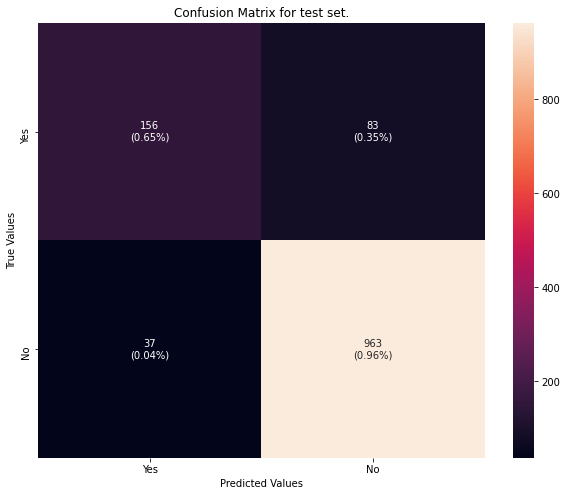

test [[156  83]
 [ 37 963]]


In [40]:
ConfusionMatrix(y_test, bagging_default.predict(X_test), set1="test")

**Remark:**
- Bagging classifier with default parameter slightly overfit. The test recall is, however, low.
    

## BAGGING CLASSIFIER - tuned

In [41]:
# Choose the type of classifier. 
bagging_tuned1 = BaggingClassifier(random_state=1)
bagging_tuned2 = BaggingClassifier(base_estimator=LogisticRegression(random_state=1), random_state=1)
# Grid of parameters to choose from
## add from article
parameters = {
                'max_samples':[0.8,0.9,1], 
              'max_features': [0.8,0.9,1],
              'n_estimators' : [40,50,100,200,250],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned1, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
print("Best parameters for decision tree base",grid_obj.best_params_)

grid_obj2 = GridSearchCV(bagging_tuned2, parameters, scoring=acc_scorer, cv=5)
grid_obj2 = grid_obj2.fit(X_train, y_train)
print("Best parameters for logistic regression base",grid_obj2.best_params_)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_
bagging_tuned2 = grid_obj2.best_estimator_


# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)
bagging_tuned2.fit(X_train, y_train)

Best parameters for decision tree base {'max_features': 0.9, 'max_samples': 0.8, 'n_estimators': 40}
Best parameters for logistic regression base {'max_features': 0.9, 'max_samples': 0.8, 'n_estimators': 40}


BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  max_features=0.9, max_samples=0.8, n_estimators=40,
                  random_state=1)

Accuracy on training set :  0.9986154378677743
Accuracy on test set :  0.910411622276029
Recall on training set :  0.992831541218638
Recall on test set :  0.6527196652719666
Precision on training set :  1.0
Precision on test set :  0.8478260869565217


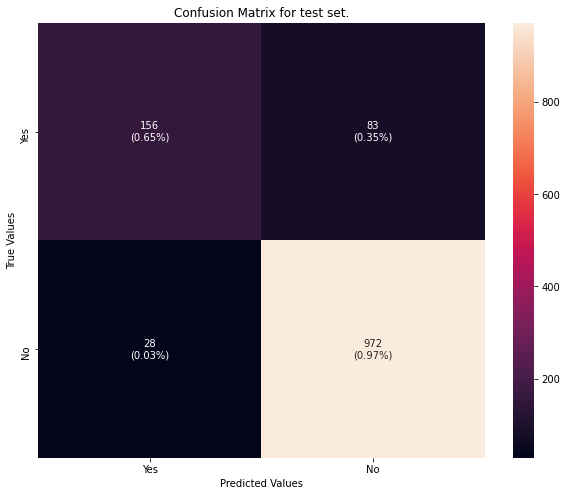

test [[156  83]
 [ 28 972]]
Accuracy on training set :  0.8431983385254413
Accuracy on test set :  0.8329297820823245
Recall on training set :  0.22580645161290322
Recall on test set :  0.17573221757322174
Precision on training set :  0.8571428571428571
Precision on test set :  0.8076923076923077


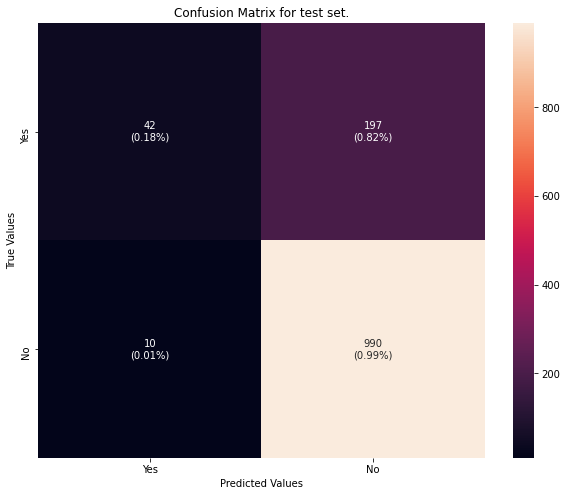

test [[ 42 197]
 [ 10 990]]


In [42]:
#Using above defined function to get accuracy, recall, and precision on train and test set
get_metrics_score(bagging_tuned, model_name="bagging_dt_tuned")
ConfusionMatrix(y_test, bagging_tuned.predict(X_test), set1="test")

#Using above defined function to get accuracy, recall, and precision on train and test set
get_metrics_score(bagging_tuned2, model_name="bagging_lg_tuned")
ConfusionMatrix(y_test, bagging_tuned2.predict(X_test), set1="test")

Next, is that we train bagging classifier with different base classfiers: decision tree and logistic regression. We tuned the two variants on the same parameters

### Insights (Default: DecisionTreeClassifier as the base_estimator)
- The model is overfitting the data, as train accuracy and recall are much higher than the test accuracy and test recall.
- The confusion matrix shows that the model is better at identifying persons who did not purchase the package as compared to those who did. So far, however, this is the best we can get.


### Insights (Logistic Regression as the base_estimator)
- Bagging classifier with logistic regression as base_estimator is not overfitting the data but the test recall and even train recall are very low.
- Ensemble models are less interpretable than decision tree but bagging classifier is even less interpretable than random forest. It does not even have a feature importance attribute.

## RANDOM FOREST - default parameters

Default parameters: sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [43]:
#Train the random forest classifier
rf_default=RandomForestClassifier(random_state=1)
rf_default.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9031476997578692
Recall on training set :  1.0
Recall on test set :  0.5815899581589958
Precision on training set :  1.0
Precision on test set :  0.8742138364779874


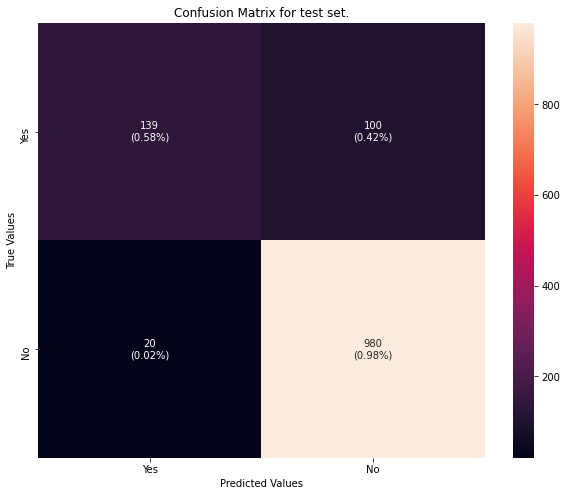

test [[139 100]
 [ 20 980]]


In [44]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(rf_default, model_name="rf_default")
ConfusionMatrix(y_test, rf_default.predict(X_test), set1="test")

**Remark:**
    

- The model overfits on the train data, and the test recall is lower than the previous bagging models.

## RANDOM FOREST - tuned

In [45]:
# Choose the type of classifier. 
rf_tuned1 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.2, 1: 0.8}], 
    "n_estimators": [150,250],
    "min_samples_leaf": [5, 7, 9],
    "max_features": [0.7, 0.9, 1.0],
    "max_samples": [0.7, 0.9, 1.0],
    
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned1, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_features=0.7,
                       max_samples=0.9, min_samples_leaf=9, n_estimators=150,
                       random_state=1)

Accuracy on training set :  0.9169262720664589
Accuracy on test set :  0.8426150121065376
Recall on training set :  0.8924731182795699
Recall on test set :  0.6443514644351465
Precision on training set :  0.7345132743362832
Precision on test set :  0.5833333333333334


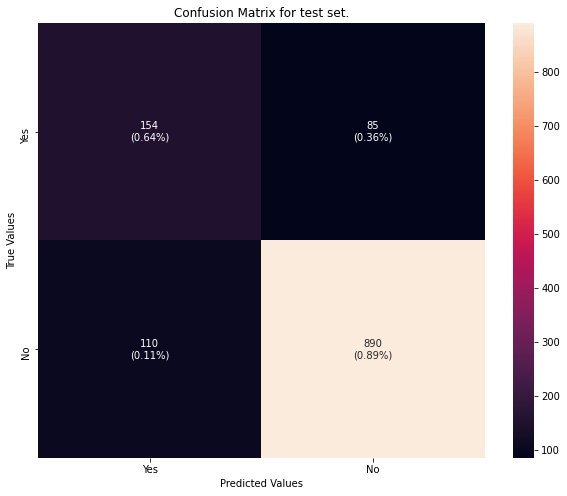

test [[154  85]
 [110 890]]


In [46]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(rf_tuned, model_name="rf_tuned")
ConfusionMatrix(y_test, rf_tuned.predict(X_test), set1="test")

**Remark:**

- Best parameters: RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_features=0.7,max_samples=0.9, min_samples_leaf=9, n_estimators=150,random_state=1)
- On tuning we are also impossibe class_weights to fix the issue that our model is imbalanced.
- The tuned Random Forest performs better than default variant in terms of overfitting. The test recall also improved but the test precision dropped. F1 score also dropped meaning in general the model worsened.

## Decision Tree

In [47]:
#Train the random forest classifier
dt_default=DecisionTreeClassifier(random_state=1)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.8845843422114609
Recall on training set :  1.0
Recall on test set :  0.7154811715481172
Precision on training set :  1.0
Precision on test set :  0.6951219512195121


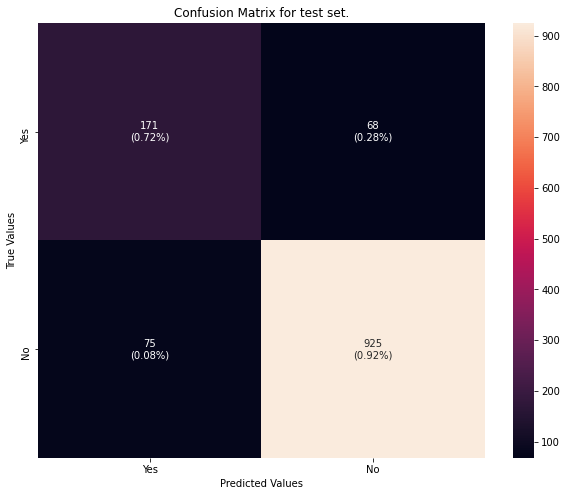

test [[171  68]
 [ 75 925]]


In [48]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(dt_default, model_name="dt_default")
ConfusionMatrix(y_test, dt_default.predict(X_test), set1="test")

In [49]:
pd.DataFrame(model_results)

,model_name,train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1
0,bagging_default,0.992731,0.903148,0.964158,0.652720,0.998145,0.808290,0.980857,0.722222
1,bagging_dt_tuned,0.998615,0.910412,0.992832,0.652720,1.000000,0.847826,0.996403,0.737589
2,bagging_lg_tuned,0.843198,0.832930,0.225806,0.175732,0.857143,0.807692,0.357447,0.288660
3,rf_default,1.000000,0.903148,1.000000,0.581590,1.000000,0.874214,1.000000,0.698492
4,rf_tuned,0.916926,0.842615,0.892473,0.644351,0.734513,0.583333,0.805825,0.612326
5,dt_default,1.000000,0.884584,1.000000,0.715481,1.000000,0.695122,1.000000,0.705155


**Insights:**
    - Decision tree with default parameters overfits. It does so well on the test recall compared to previous model but falls short on the test precision

In [50]:
# Choose the type of classifier. 
dt_tuned1 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": [2,6,10,15],
    "min_samples_leaf": [4,8,12,16],
    "max_features": [0.7,0.9,1.0],
    'max_leaf_nodes' : [2, 3, 5, 10,30,50],
    'min_impurity_decrease': [0.001,0.01,0.1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dt_tuned1, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=0.9, max_leaf_nodes=50,
                       min_impurity_decrease=0.001, min_samples_leaf=4,
                       random_state=1)

Accuracy on training set :  0.9003115264797508
Accuracy on test set :  0.8401937046004843
Recall on training set :  0.6218637992831542
Recall on test set :  0.4602510460251046
Precision on training set :  0.8183962264150944
Precision on test set :  0.6145251396648045


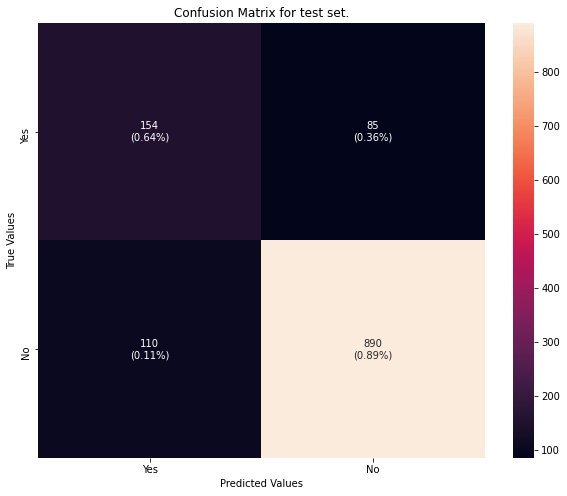

test [[154  85]
 [110 890]]


In [51]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(dt_tuned, model_name="dt_tuned")
ConfusionMatrix(y_test, rf_tuned.predict(X_test), set1="test")

**Insights:**
    - Tuned Decision Tree does not overfit but the test recall is so low.

In [52]:
importances1 = dt_tuned.feature_importances_
indices = np.argsort(importances1)
feature_names = list(X.columns)
r = {
    "Column": feature_names,
    "Importance": importances1
}
print("TOP 3")
pd.DataFrame(r).sort_values(by="Importance", ascending=False)[:3]

TOP 3


,Column,Importance
8,Passport,0.162585
0,Age,0.161820
2,DurationOfPitch,0.149581


# 2. BOOSTING

## AdaBoost - default parameters

In [53]:
ada_default = AdaBoostClassifier(random_state=1)
ada_default.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

Accuracy on training set :  0.847005884389062
Accuracy on test set :  0.8216303470540759
Recall on training set :  0.3870967741935484
Recall on test set :  0.2928870292887029
Precision on training set :  0.6835443037974683
Precision on test set :  0.5737704918032787


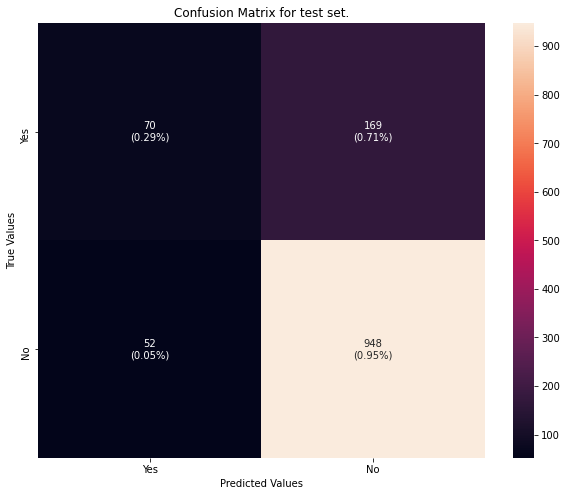

test [[ 70 169]
 [ 52 948]]


In [54]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(ada_default, model_name="ada_default")
ConfusionMatrix(y_test, ada_default.predict(X_test), set1="test")

**Remarks:**
 - Adaboost model with default parameters does not overfit but has low test recall and test precision compared with the other models

## AdaBoost - tuned

In [55]:
# Choose the type of classifier. 
ada_tuned1 = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator": [DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate": np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ada_tuned1, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ada_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ada_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.7, n_estimators=100, random_state=1)

Accuracy on training set :  0.9951540325372101
Accuracy on test set :  0.8539144471347861
Recall on training set :  0.985663082437276
Recall on test set :  0.5774058577405857
Precision on training set :  0.9892086330935251
Precision on test set :  0.6330275229357798


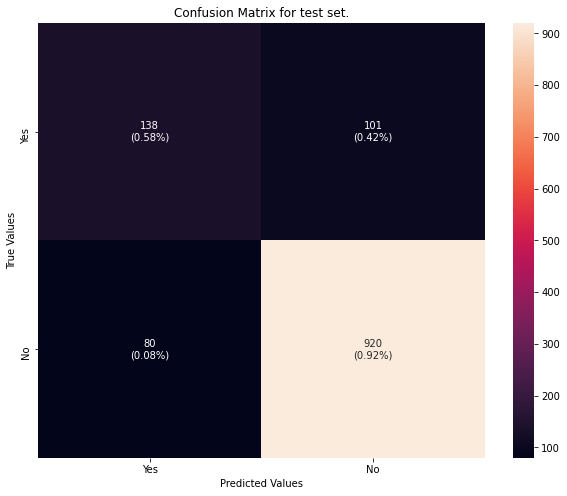

test [[138 101]
 [ 80 920]]


In [56]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(ada_tuned, model_name="ada_tuned")
ConfusionMatrix(y_test, ada_tuned.predict(X_test), set1="test")

In [57]:
importances = ada_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
r = {
    "Column": feature_names,
    "Importance": importances
}
print("TOP 3")
pd.DataFrame(r).sort_values(by="Importance", ascending=False)[:3]

TOP 3


,Column,Importance
12,MonthlyIncome,0.254679
0,Age,0.145667
2,DurationOfPitch,0.144840


**Remark:**
- Tuned adaboost perfomed better than the one with default params except that it slightly overfits. It attained better test recall and test precision.

## Gradient Boosting - default parameters

In [58]:
gb_default = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gb_default.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

Accuracy on training set :  0.9016960886119765
Accuracy on test set :  0.8547215496368039
Recall on training set :  0.5627240143369175
Recall on test set :  0.39748953974895396
Precision on training set :  0.8870056497175142
Precision on test set :  0.7251908396946565


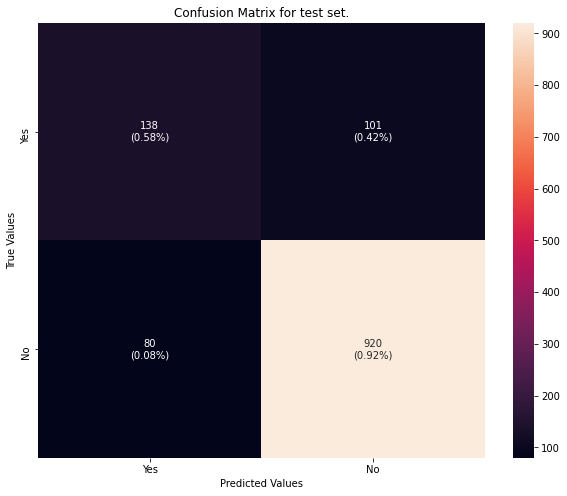

test [[138 101]
 [ 80 920]]


In [59]:
get_metrics_score(gb_default, model_name="gb_default")
ConfusionMatrix(y_test, ada_tuned.predict(X_test), set1="test")

## Gradient Boosting - tuned

In [60]:
# Choose the type of classifier. 
gb_tuned1 = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned1, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

Accuracy on training set :  0.9435790931118034
Accuracy on test set :  0.8692493946731235
Recall on training set :  0.7347670250896058
Recall on test set :  0.502092050209205
Precision on training set :  0.9647058823529412
Precision on test set :  0.7361963190184049


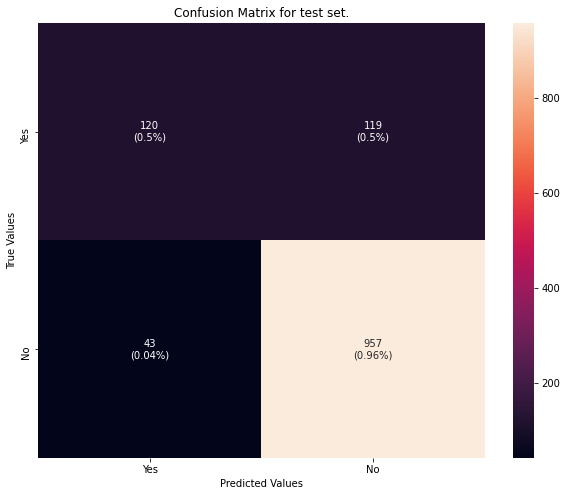

test [[120 119]
 [ 43 957]]


In [61]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(gb_tuned, model_name="gb_tuned")
ConfusionMatrix(y_test, gb_tuned.predict(X_test), set1="test")

In [62]:
pd.DataFrame(model_results)

,model_name,train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1
0,bagging_default,0.992731,0.903148,0.964158,0.652720,0.998145,0.808290,0.980857,0.722222
1,bagging_dt_tuned,0.998615,0.910412,0.992832,0.652720,1.000000,0.847826,0.996403,0.737589
2,bagging_lg_tuned,0.843198,0.832930,0.225806,0.175732,0.857143,0.807692,0.357447,0.288660
3,rf_default,1.000000,0.903148,1.000000,0.581590,1.000000,0.874214,1.000000,0.698492
4,rf_tuned,0.916926,0.842615,0.892473,0.644351,0.734513,0.583333,0.805825,0.612326
5,dt_default,1.000000,0.884584,1.000000,0.715481,1.000000,0.695122,1.000000,0.705155
6,dt_tuned,0.900312,0.840194,0.621864,0.460251,0.818396,0.614525,0.706721,0.526316
7,ada_default,0.847006,0.821630,0.387097,0.292887,0.683544,0.573770,0.494279,0.387812
8,ada_tuned,0.995154,0.853914,0.985663,0.577406,0.989209,0.633028,0.987433,0.603939
9,gb_default,0.901696,0.854722,0.562724,0.397490,0.887006,0.725191,0.688596,0.513514


Remark:
- Tuned gradient boost performed better than gradient boosting.

## XGBoost - default parameters

In [63]:
xgb_default = XGBClassifier(random_state=1)
xgb_default.fit(X_train,y_train, eval_metric="error")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy on training set :  0.9996538594669436
Accuracy on test set :  0.9209039548022598
Recall on training set :  0.9982078853046595
Recall on test set :  0.694560669456067
Precision on training set :  1.0
Precision on test set :  0.8691099476439791


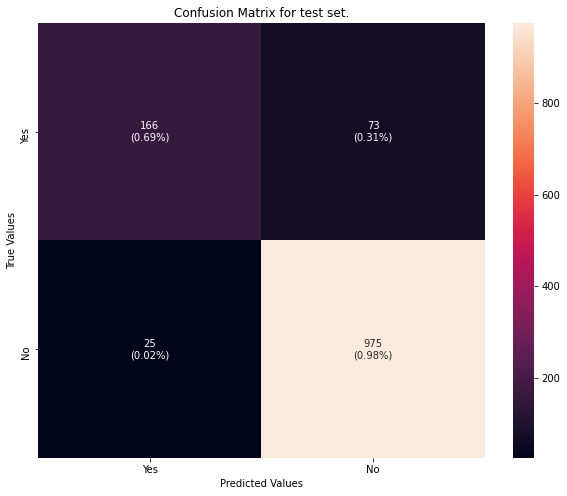

test [[166  73]
 [ 25 975]]


In [64]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(xgb_default, model_name="xgb_default")
ConfusionMatrix(y_test, xgb_default.predict(X_test), set1="test")

## XGBoost - tuned

In [65]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": [50,100,150],
    "scale_pos_weight":[2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train, eval_metric="error")

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train, eval_metric="error")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.9, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy on training set :  0.9667705088265836
Accuracy on test set :  0.8789346246973365
Recall on training set :  0.989247311827957
Recall on test set :  0.7824267782426778
Precision on training set :  0.8598130841121495
Precision on test set :  0.656140350877193


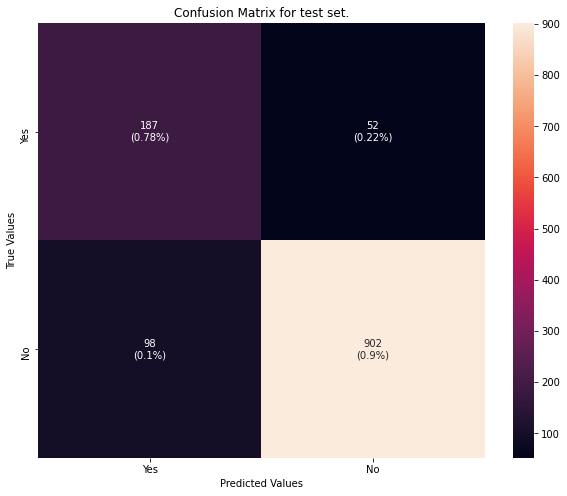

test [[187  52]
 [ 98 902]]


In [66]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(xgb_tuned,model_name ="xgb_tuned")
ConfusionMatrix(y_test, xgb_tuned.predict(X_test), set1="test")

In [69]:
df = pd.DataFrame(model_results)
df.to_csv("results.csv", index=False)
df

,model_name,train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1
0,bagging_default,0.992731,0.903148,0.964158,0.652720,0.998145,0.808290,0.980857,0.722222
1,bagging_dt_tuned,0.998615,0.910412,0.992832,0.652720,1.000000,0.847826,0.996403,0.737589
2,bagging_lg_tuned,0.843198,0.832930,0.225806,0.175732,0.857143,0.807692,0.357447,0.288660
3,rf_default,1.000000,0.903148,1.000000,0.581590,1.000000,0.874214,1.000000,0.698492
4,rf_tuned,0.916926,0.842615,0.892473,0.644351,0.734513,0.583333,0.805825,0.612326
5,dt_default,1.000000,0.884584,1.000000,0.715481,1.000000,0.695122,1.000000,0.705155
6,dt_tuned,0.900312,0.840194,0.621864,0.460251,0.818396,0.614525,0.706721,0.526316
7,ada_default,0.847006,0.821630,0.387097,0.292887,0.683544,0.573770,0.494279,0.387812
8,ada_tuned,0.995154,0.853914,0.985663,0.577406,0.989209,0.633028,0.987433,0.603939
9,gb_default,0.901696,0.854722,0.562724,0.397490,0.887006,0.725191,0.688596,0.513514
